In [1]:
rootPath = 'C:/Users/Rowan/Dropbox/'

import numpy as np
import importlib
import sys
sys.path.append(rootPath + 'GarminDataProject/GarminDataAnalytics')
sys.path.append(rootPath + 'Python/Utilities')
import fit_parser as fp
import signal_utils as su

import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')

In [2]:
homeDir = rootPath + 'GarminDataProject/'
fName = '2016-08-27-09-38-53'
srcePath = homeDir + 'FitFiles/' + fName + '.fit'
destPath = homeDir + 'csvFiles/' + fName + '.csv'

In [3]:
importlib.reload(fp)

act = fp.Activity()
act.csv_parse(destPath)

Generated activity object.
Parsing file...
Finished parsing file.


<IPython.core.display.Javascript object>


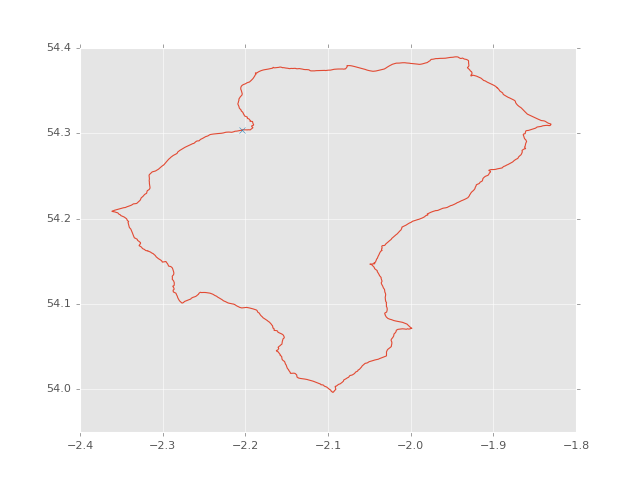

-2.20399931073 54.3037536833


In [9]:
#print(act.dataDict)
scal = 180/2**31
plt.figure()
plt.plot(act.dataDict['position_long']*scal,act.dataDict['position_lat']*scal)
plt.plot(act.dataDict['position_long'][0]*scal,act.dataDict['position_lat'][0]*scal,'x')
print(act.dataDict['position_long'][0]*scal,act.dataDict['position_lat'][0]*scal)

<IPython.core.display.Javascript object>


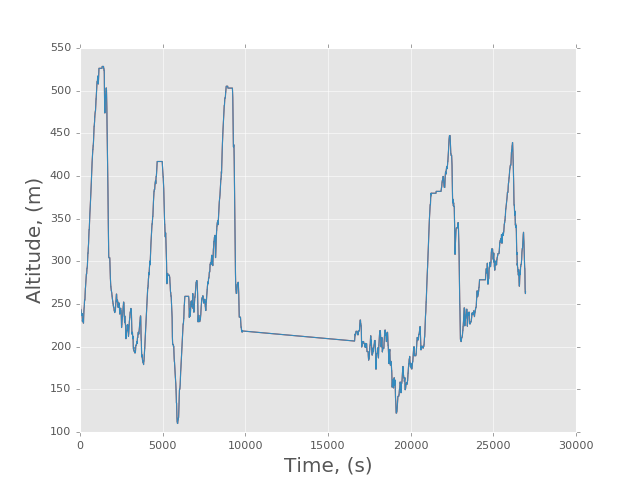

In [17]:
plt.figure()
plt.plot(act.dataDict['timestamp']-act.dataDict['timestamp'][0],act.dataDict['altitude'])
plt.plot(act.dataDict['timestamp']-act.dataDict['timestamp'][0],act.dataDict['enhanced_altitude'])
plt.xlabel(r'Time, (s)',fontsize=18)
plt.ylabel(r'Altitude, (m)',fontsize=18)

I now want to see if it is clear which gear is being used at any one time. A simple plot of cadence against speed should reveal diagonal lines of varying slope. The next step is to plot the ratio of speed to cadence, excluding times when the cadence is zero.

<IPython.core.display.Javascript object>


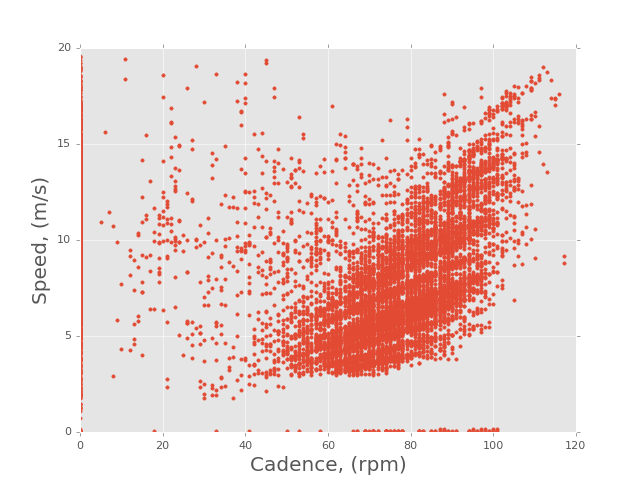

In [16]:
plt.figure()
plt.plot(act.dataDict['cadence'],act.dataDict['speed'], '.')
plt.xlabel(r'Cadence, (rpm)',fontsize=18)
plt.ylabel(r'Speed, (m/s)',fontsize=18)

<IPython.core.display.Javascript object>


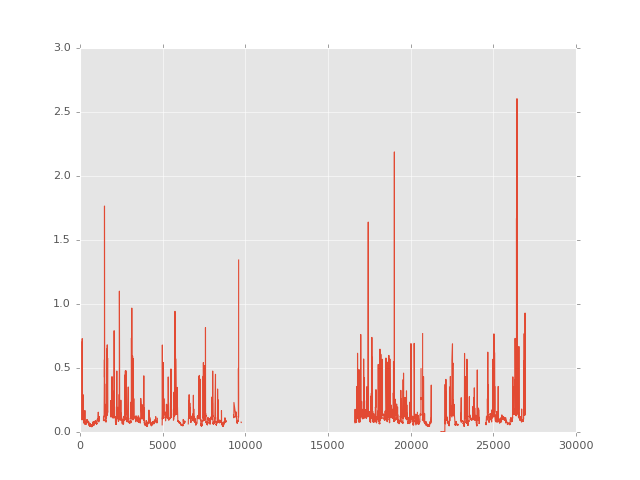

In [24]:
idx = act.dataDict['cadence'] == 0
gear = act.dataDict['speed'][~idx]/act.dataDict['cadence'][~idx]

plt.figure()
plt.plot(act.dataDict['timestamp'][~idx]-act.dataDict['timestamp'][0],gear)

<IPython.core.display.Javascript object>


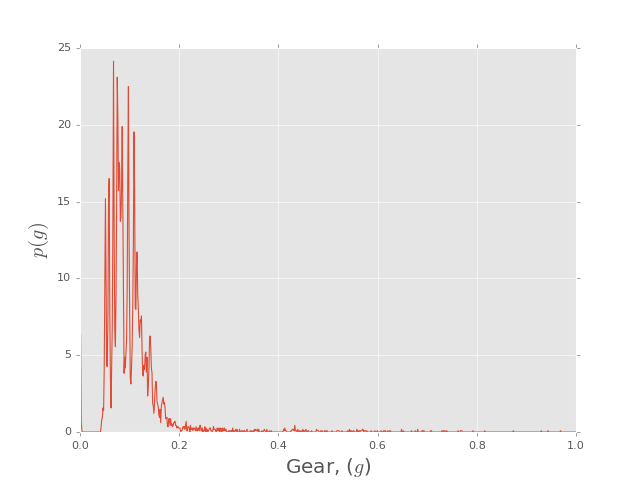

In [34]:
x,y = su.gen_pdf(gear,np.linspace(0,1,800))
plt.figure()
plt.plot(x,y)
plt.xlabel(r'Gear, ($g$)',fontsize=18)
plt.ylabel(r'$p(g)$',fontsize=18)